# Gaussian Mixture Models

<img src='macro_gaus.png' width=600px>
<img src='1D_gaus.png' width=600px>

# Gaussian Distributions (Normal)
<img src='norm_dist.png' width=600px>
<img src='gaus_dist1.png' width=600px>
<img src='gaus_dist2.png' width=600px>
<img src='gaus_dist3.png' width=600px>
<img src='gaus_dist4.png' width=600px>

__________

## Gaussian Mixture Model (GMM) Clustering
Combine both tests' data points as they are on the same scale (0-100) and we have mixed the gaussian distributions
<img src='gaus_mix1.png' width=600px>
* The distributions are preserved, but they do not make one Gaussian distribution, rather the mixing allows them to exist simultaneously in the same range
* Without knowing which data points came from which distribution, the distributions can be infered and the points with the higher probability of belonging to one gaussian distribution in the mixture over another are predicted to be as such, assigned to the respective test
> 1 Mix the data
<img src='gaus_mix2.png' width=600px>
> 2 Find the data's distribution as a whole
<img src='gaus_mix3.png' width=600px>
> 3 Determine the different distributions and assign the data points based to the distribution that the probability is highest they belong to
<img src='gaus_mix4.png' width=600px>

# Gaussian Distribution | Two Dimensions
<img src='gaus_2d1.png' width=900px>

* Plotting the two scores against one another yeilds the above visualization

> * Scatter in the middle
> * Histograms at the top and side (revealing each follows a gaussian distribution)
> * Orange "+" is the mean of each
> * Circles are the standard deviations (just as before)
>> * First circle contains 68% of the data
>> * Second contains 95%
>> * Third contains 99%

**Note the two different mixes (total of 4 distributions**
<img src='gaus_2d2.png' width=600px>
**Combining them, we can infer their original lables**
<img src='gaus_2d3.png' width=600px>

# Using GMM for prediction - Expectation Maximization

<img src='gaus_exp1.png' width=900px>

* To begin, it is common to use K-Means first to distinguish what kind of clusters there may be and then determine the number of distributions for `Step 1: Initialize Gaussian Distributions`

* `Step 1:` Initialize Gaussian Distributions by determining a mean and variance
<img src='gaus_exp2.png' width=900px>


* `Step 2:` Soft-cluster the Data Points (Expectation Step)
<img src='gaus_exp3.png' width=900px>

* `Step 3:` Re-Estimate Parameters of Gaussians Maximization Step
<img src='gaus_exp4.png' width=900px>
<img src='gaus_exp4a.png' width=900px>

* `Step 4:` Evaluate log-likelihood
> the higher this value, the more sure we are that this point is correctly classfied
<img src='gaus_exp5.png' width=900px>

# Implementing with SKLearn

In [25]:
from sklearn import datasets, mixture
#Load dataset
X = datasets.load_iris().data[:10]

# Specify the parameters for the clustering
gmm = mixture.GaussianMixture(n_components=3)
gmm.fit(X)
clustering = gmm.predict(X)
# "Clustering" now contains an array representing which each point belongs to:
# [1 0 0 0 1 2 0 1 0 0]

# GMM Overview
Paper: [Nonparametric discovery of human routines from sensor data](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.681.3152&rep=rep1&type=pdf)

Paper: [Application of the Gaussian mixture model in pulsar astronomy](https://arxiv.org/abs/1205.6221)

Paper: [Speaker Verification Using Adapted Gaussian Mixture Models](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.117.338&rep=rep1&type=pdf)

Paper: [Adaptive background mixture models for real-time tracking](http://www.ai.mit.edu/projects/vsam/Publications/stauffer_cvpr98_track.pdf)

Video: https://www.youtube.com/watch?v=lLt9H6RFO6A

<img src='gaus_overv.png' width=900px>

# Cluster Analysis Process
<img src='clust_an1.png' width = 600px>

# Cluster Validation
* External indices - we have labels (supervised)
* Internal indices - we don't have labels (unsupervised)
* Relative indices - indicates which of two clustering structures is "better"
<img src='clust_an2.png' width = 600px>
* Compactness - measure of how close the elements of a cluster are to each other (within the cluster)
* Separability - measure of how far are distinct clusters (not the elements of the cluster) are from one another

# Cluster Validation - External Indices
* Can use when we have labeled data
<img src='clust_an3.png' width = 600px>

[Details of the Adjusted Rand index and Clustering algorithms Supplement to the paper “An empirical study on Principal Component Analysis for clustering gene expression data”](http://faculty.washington.edu/kayee/pca/supp.pdf)

<img src='clust_val1.png' width = 600px>

<img src='clust_val2.png' width = 600px>

# Cluster Validation - Internal Indices
* Can use when we have unlabeled data
<img src='clust_val3.png' width = 600px>

[Density-Based Clustering Validation (PDF)](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=83C3BD5E078B1444CB26E243975507E1?doi=10.1.1.707.9034&rep=rep1&type=pdf)

<img src='clust_val4.png' width = 600px>

* Perform the calculation $S_{i} = \frac{b_{i}-a_{i}}{max(a_{i},b_{i})}$ for each point within the cluster and then we average all of those $S_{i}$s and we have the silhoutte coefficient for the entire cluster

* This can then be averaged for each cluster and yield the silhoutte score for the entire dataset given the algorithm applied

<img src='clust_val5.png' width = 600px>

<img src='clust_val6.png' width = 600px>

* Silhoutte coefficient is a better validation technique for some algorithms than others

> It performs poorly on DBSCAN as it doesn't account for noise

> DBCV is more appropriate for DBSCAN

<img src='clust_val7.png' width = 600px>
<img src='clust_val8.png' width = 600px>

# Implementation

## 1. KMeans vs GMM on a Generated Dataset

In the first example we'll look at, we'll generate a Gaussian dataset and attempt to cluster it and see if the clustering matches the original labels of the generated dataset.

We can use sklearn's [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function to create a dataset of Gaussian blobs:

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [27]:
n = 1000
varied = datasets.make_blobs(n_samples=n,
                            cluster_std=[5, 1, 0.5],
                            random_state=3)
X, y = varied[0], varied[1]

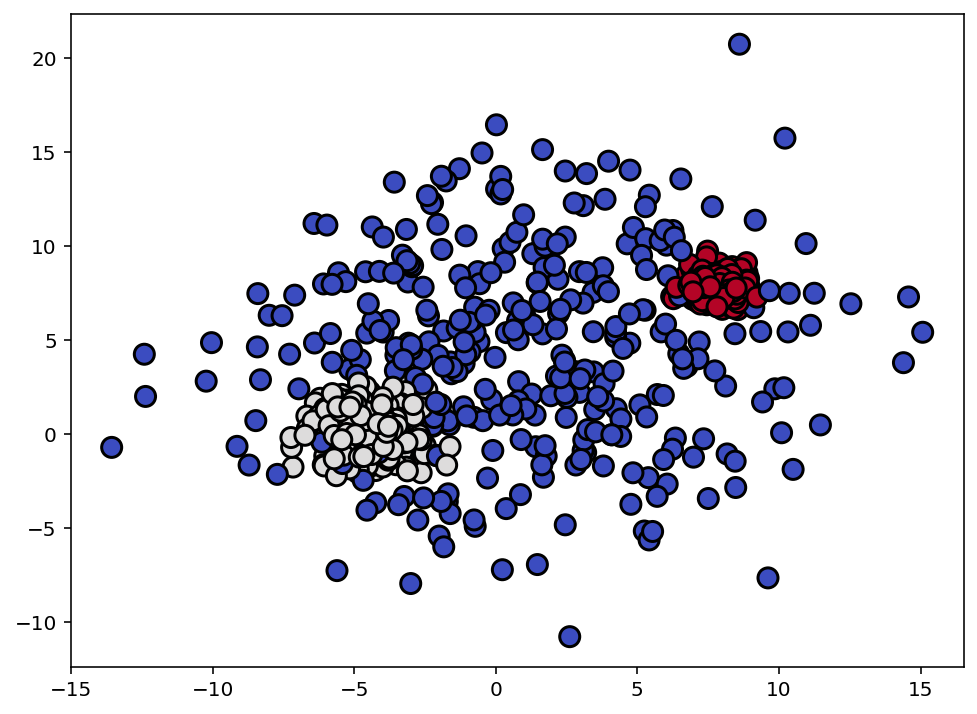

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='black', lw=1.5, s=100, cmap=plt.get_cmap('coolwarm'))
plt.show()

When we hand off this dataset to the clustering algorithms, we obviously will not pass in the labels.

So let's start with KMeans and see how it does with the dataset.

WIll it be able to produce clusters that match the original labels?

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)

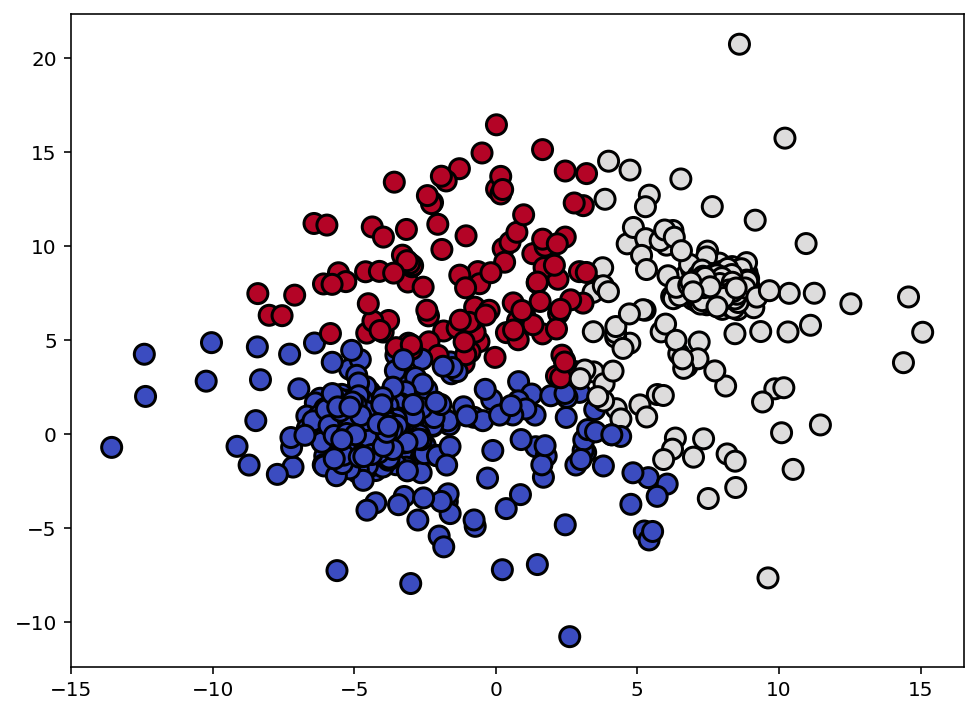

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=pred, edgecolors='black', lw=1.5, s=100, cmap='coolwarm')
plt.show()

How good of a job did KMeans do? **Not great**

Was it able to find clusters that match or are similar to the original labels? **Not really**

Let us now try clustering with [GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html):

In [32]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
model = gmm.fit(X)
pred_gmm = model.predict(X)

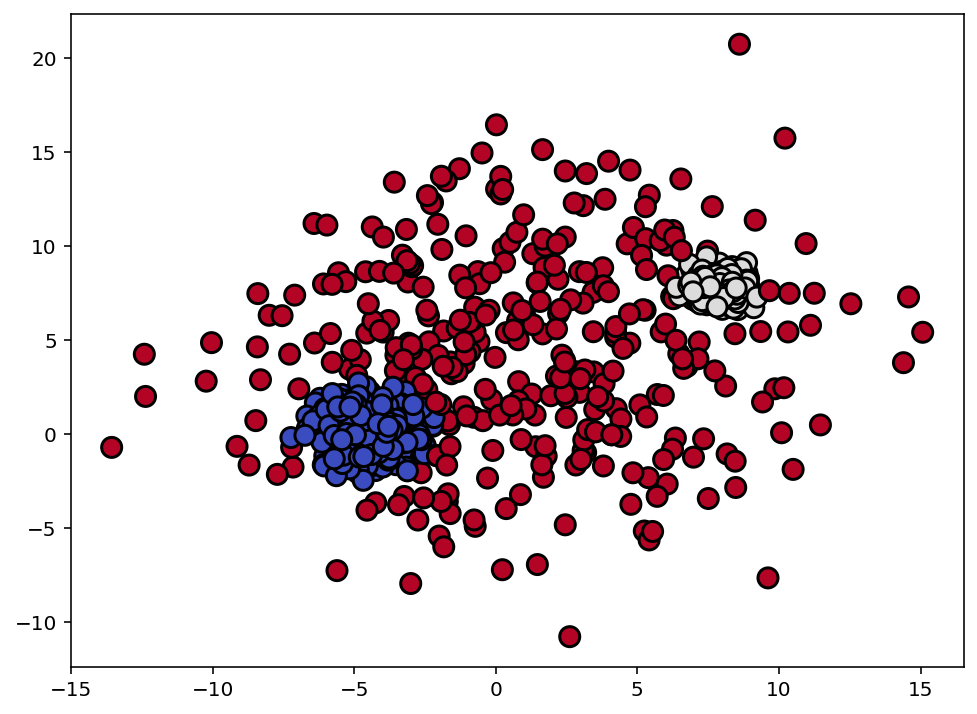

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=pred_gmm, edgecolors='black', lw=1.5, s=100, cmap='coolwarm')
plt.show()

By visually comparing the result of KMeans and GMM clustering, which one was better able to match the original?
**GMM outperforms KNN at a glance**

# 2. KMeans vs GMM on The Iris Dataset

For our second example, we'll take a dataset that has more than two features. The Iris dataset is great for this purpose since it is reasonable to assume it's distributed according to Gaussian distributions.

The Iris dataset is a labeled dataset with four features:

In [34]:
import seaborn as sns

In [35]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How do you visualize a datset with four dimensions? 

There are a few ways (e.g. [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), or [project into a lower number number dimensions using PCA](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)).

Let's attempt to visualize using PairGrid because it does not distort the dataset -- it merely plots every pair of features against each other in a subplot:

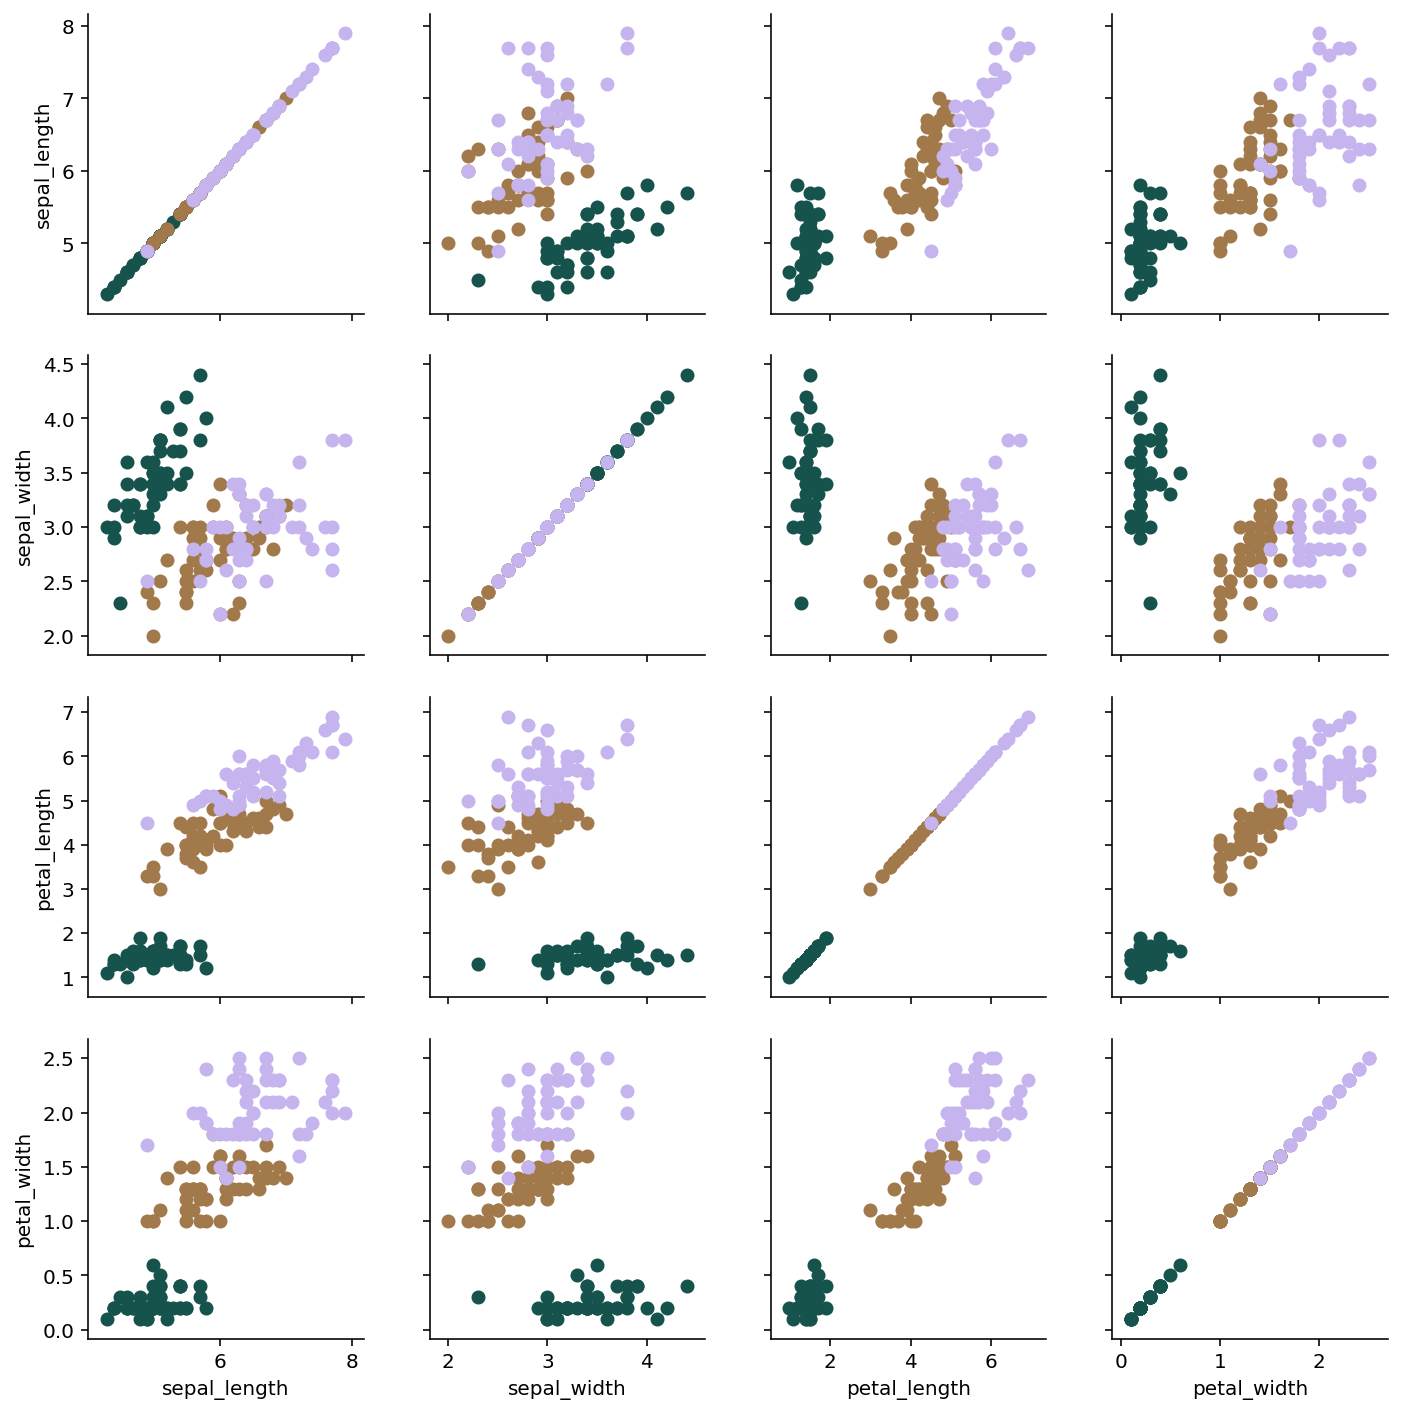

In [36]:
var = ['sepal_length','sepal_width','petal_length','petal_width']
g = sns.PairGrid(iris,
                 hue='species',
                 palette=sns.color_palette('cubehelix', 3),
                vars=var)
g.map(plt.scatter)
plt.show()

If we cluster the Iris dataset using KMeans, how close would the resulting clusters match the original labels?

In [37]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

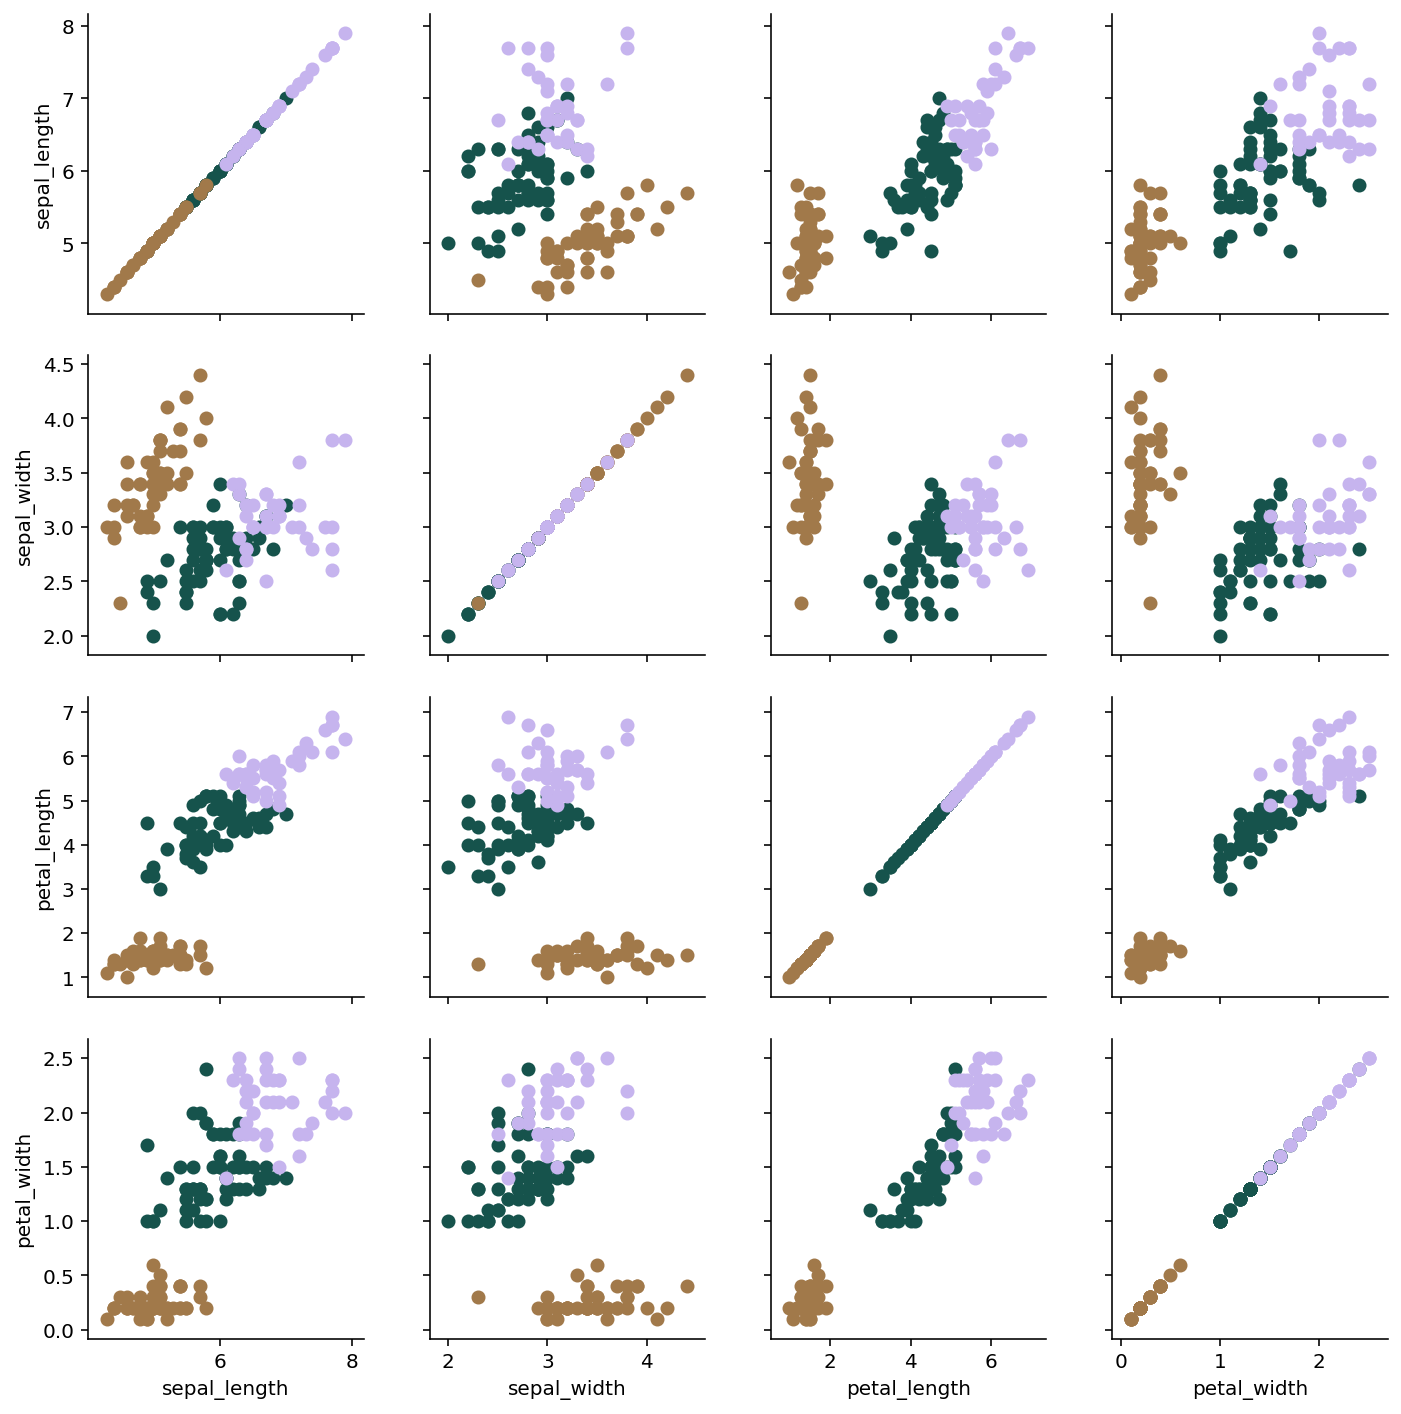

In [38]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

How do these clusters match the original labels? **Fairly well, visually**

You can clearly see that visual inspection is no longer useful if we're working with multiple dimensions like this. So how can we evaluate the clustering result versus the original labels? **Silhoutte or some other method like Rand (or adjusted Rand)**

You guessed it. We can use an external cluster validation index such as the [adjusted Rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [39]:
# TODO: Import adjusted rand score
from sklearn.metrics import adjusted_rand_score

# TODO: calculate adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_kmeans_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])

# Print the score
iris_kmeans_score

0.7302382722834697

What if we cluster using Gaussian Mixture models? Would it earn a better ARI score?

In [40]:
gmm_iris = GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [41]:
iris['gmm_pred'] = pred_gmm_iris

# TODO: calculate adjusted rand score passing in the original 
# labels and the GMM predicted labels iris['species']
iris_gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])

# Print the score
iris_gmm_score

0.9038742317748124

Thanks to ARI socres, we have a clear indicator which clustering result better matches the original dataset.